## Actividad 2 - Guia 1

#### Proyecto 1 – Predecir la calidad del Vino

Integrantes: 
* Victor Andres Vargas Niño
* Melissa Garcia Herrera

#### Descripción del problema

Es un conjunto de datos de muestra de vino tinto, cuyo dataset contiene las siguientes variables:

* 1 - fixed acidity: Influye en el sabor del vino. Una reducción significativa de los ácidos puede dar lugar a vinos con un sabor simple.
* 2 - volatile acidity: Estos ácidos deben destilarse del vino antes de finalizar el proceso de elaboración. El exceso de ácidos volátiles es indeseable y produce un sabor desagradable.
* 3 - citric acid: Cantidad de ácido cítrico que contiene el vino, cuya mayor parte suele consumirse durante el proceso de fermentación.
* 4 - residual sugar: La cantidad de azúcar que queda después del final de la fermentación. El objetivo es tener un equilibrio perfecto entre dulzor y acidez.
* 5 - chlorides: La cantidad de sal en el vino.
* 6 - free sulfur dioxide: La cantidad de dióxido de azufre (SO2) en forma libre. Una cantidad excesiva no es deseable y produce un olor acre.
* 7 - total sulfur dioxide: La cantidad total de (SO2) en el vino. Esto se agrega para matar las bacterias dañinas y preservar la calidad y la frescura.
* 8 - density: Se utiliza como medida de la conversión de azúcar en alcohol. Los vinos más dulces tienen mayor densidad.
* 9 - pH: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico).
* 10 - sulphates: Cantidad de sales minerales que contiene azufre en el vino. Están relacionados con el proceso de fermentación y afectan el aroma y sabor del vino.
* 11 - alcohol: El alcohol se forma como resultado de la conversión del azúcar por parte de la levadura durante el proceso de fermentación.
* 12 - quality (score between 0 and 10): Una etiqueta de calidad en el rango de 0 (muy mala) a 10 (muy excelente).


#### Librerias

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn import datasets, metrics
from scipy import stats

#### Carga de los datos

In [6]:
wine = pd.read_csv(r'D:\VivoBook\Desktop\Especializacion ML\Machine Learning\Guia 1\Data\winequality-red.csv', sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Descripción de las variables de la base

In [7]:
wine.shape

(1599, 12)

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Analisis Exploratorio

In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
wine.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


C:\Users\VivoBook\AppData\Local\Temp\ipykernel_18324\4086148675.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=wine, x=i, bins=50, palette="ocean")  # Ajustar el número de bins según sea necesario
C:\Users\VivoBook\AppData\Local\Temp\ipykernel_18324\4086148675.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=wine, x=i, bins=50, palette="ocean")  # Ajustar el número de bins según sea necesario


C:\Users\VivoBook\AppData\Local\Temp\ipykernel_18324\4086148675.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=wine, x=i, bins=50, palette="ocean")  # Ajustar el número de bins según sea necesario
C:\Users\VivoBook\AppData\Local\Temp\ipykernel_18324\4086148675.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=wine, x=i, bins=50, palette="ocean")  # Ajustar el número de bins según sea necesario
C:\Users\VivoBook\AppData\Local\Temp\ipykernel_18324\4086148675.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=wine, x=i, bins=50, palette="ocean")  # Ajustar el número de bins según sea necesario
C:\Users\VivoBook\AppData\Local\Temp\ipykernel_18324\4086148675.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=wine, x=i, bins=50, palette="ocean")  # Ajustar el número de bins según se

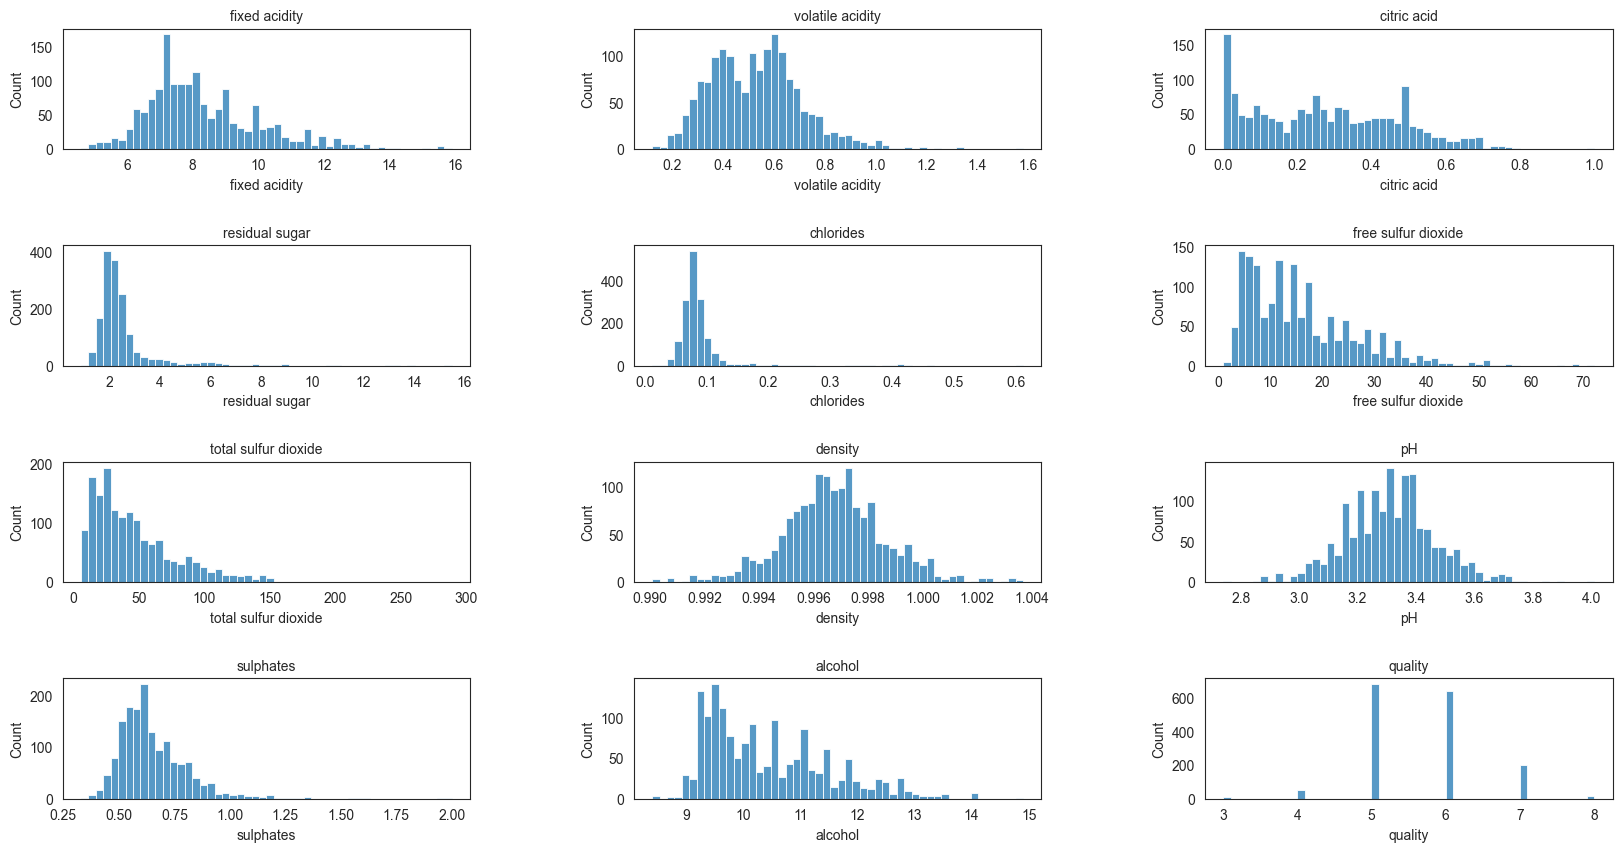

In [11]:
plt.figure(figsize = [20, 10]) # largo de la figura de subplot
sns.set_style("white")

columnas = wine.columns.tolist()
conteo=1

for i in columnas:
        plt.subplot(4, 3, conteo)  # Ajustar el número de filas en el primer argumento
        sns.histplot(data=wine, x=i, bins=50, palette="ocean")  # Ajustar el número de bins según sea necesario
        plt.title(i,fontsize=10)
        plt.ylabel("Count")
        plt.xlabel(i)
        conteo += 1

plt.subplots_adjust(hspace=0.8, wspace=0.4)  # Ajustar el espacio vertical entre subplots
plt.show()

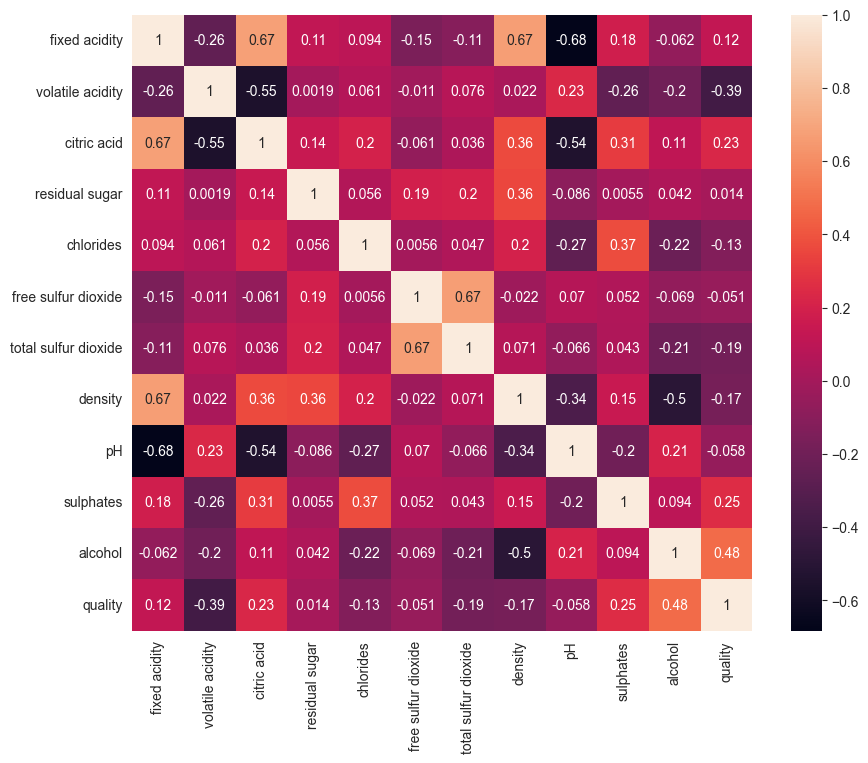

In [12]:
plt.figure(figsize=(10, 8))  # Definir el tamaño de la figura
sns.heatmap(wine.corr(numeric_only=True), annot=True)
plt.show()

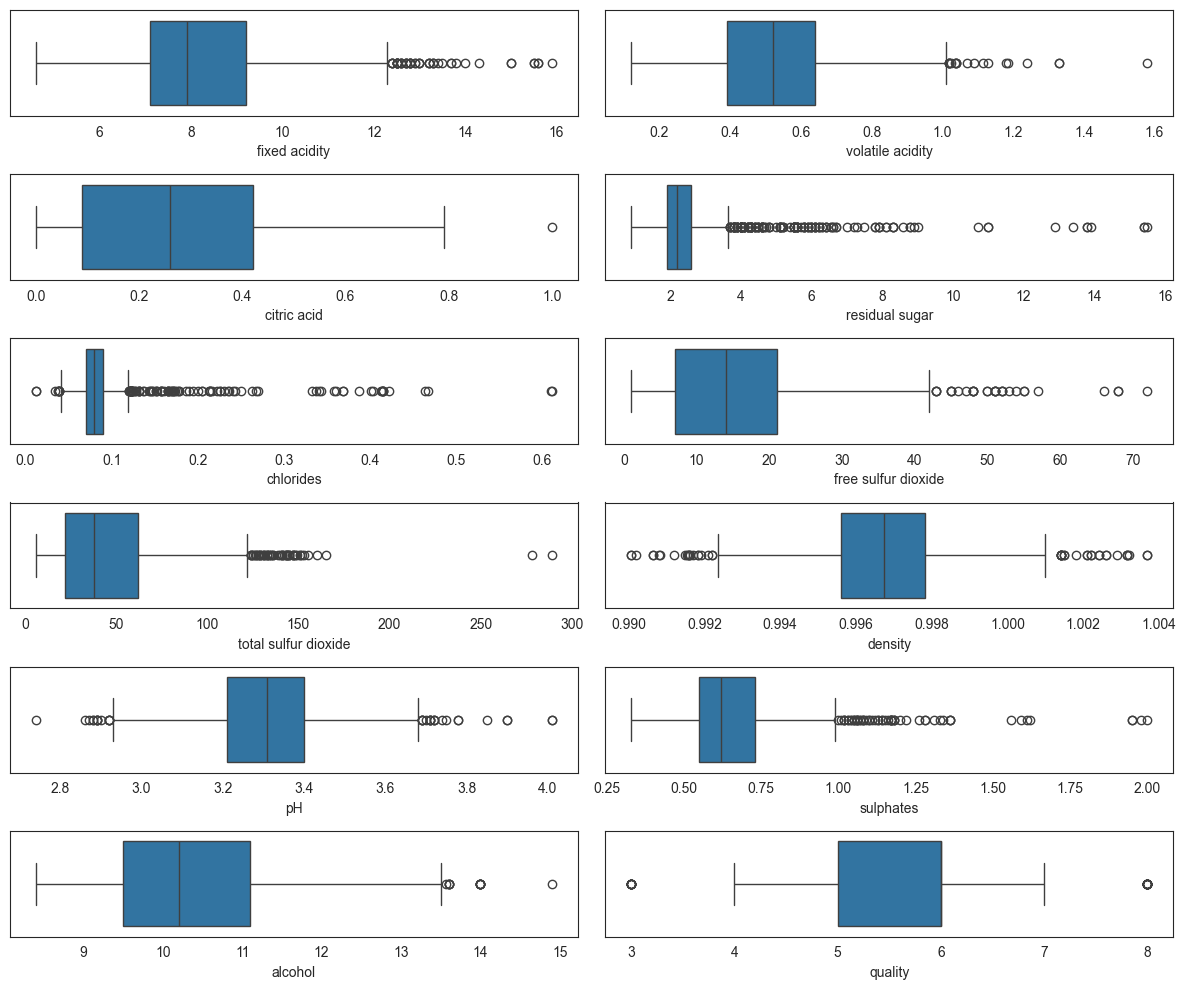

In [13]:
# Crear la figura y los subgráficos
fig, axes = plt.subplots(6, 2, figsize=(12, 10))

# Obtener los nombres de las columnas numéricas en el DataFrame wine
columnas_numericas = wine.columns

# Iterar sobre las columnas numéricas y trazar un boxplot en cada subgráfico
for i, columna in enumerate(columnas_numericas):
    sns.boxplot(x=columna, data=wine, ax=axes[i//2, i%2])  # Dividir los subgráficos en 2 filas y 2 columnas

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

#### 5. Determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información.

* El dataset tiene 12 variables de las cuales 11 son variables explicativas y 1 es la variable objetivo (quality), el dataset tiene un total de 1599 registros que no contienen datos nulos y todas la variables son numericas.
* Al realizar un analisis exploratorio de este dataset se puede observar que la mayoria de estas variables tienen una distribución normal, la variable objetivo tiene una moda y media de 5 dandole este puntaje a la mayoria de los vinos analizados. 
* Revisando el grafico de correlación se puede evidenciar que las correlaciones mas altas son de la variables Fixed Acid y ph cuyo valor es de -0.68, seguido por volatile acity y critic acity (-0.55), y por ultimo critic acity y ph (-0.54), al ser estos valores negativos indica que la relacion es negativa entre ellas es decir, que si aumenta una variable la otra disminuye.
* Con el grafico de boxplot para cada una de las variables analizadas se puede observar que hay algunos datos que están a más de 1.5 veces el rango intercuartílico de cada una de ellas lo que podria indicar que pueden existir outliers.

#### 6. La variable quality es la variable objetivo, con lo consultado anteriormente haga una regresión lineal para predecir quality. Evalue los valores del error cuadrático medio y R2. Haga sus conclusiones, si ve la posibilidad de reentrenar el modelo y mejorar sus resultados hágalo. 

#### Regresion Lineal

In [14]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(wine.drop(columns=['quality'])
                                                 , wine['quality'], test_size=0.2, random_state=123)

In [15]:
Modelo_Lr = Pipeline(steps=[("scaler", StandardScaler()),
                                ("lr", LinearRegression())])
Modelo_Lr.fit(Xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [16]:
Modelo_Lr.fit(Xtrain, ytrain)
print("Modelo Regresion Lineal: %3f" % Modelo_Lr.score(Xtest, ytest))

Modelo Regresion Lineal: 0.343596


In [17]:
y_pred = Modelo_Lr.predict(Xtrain)
residual =  ytrain - y_pred

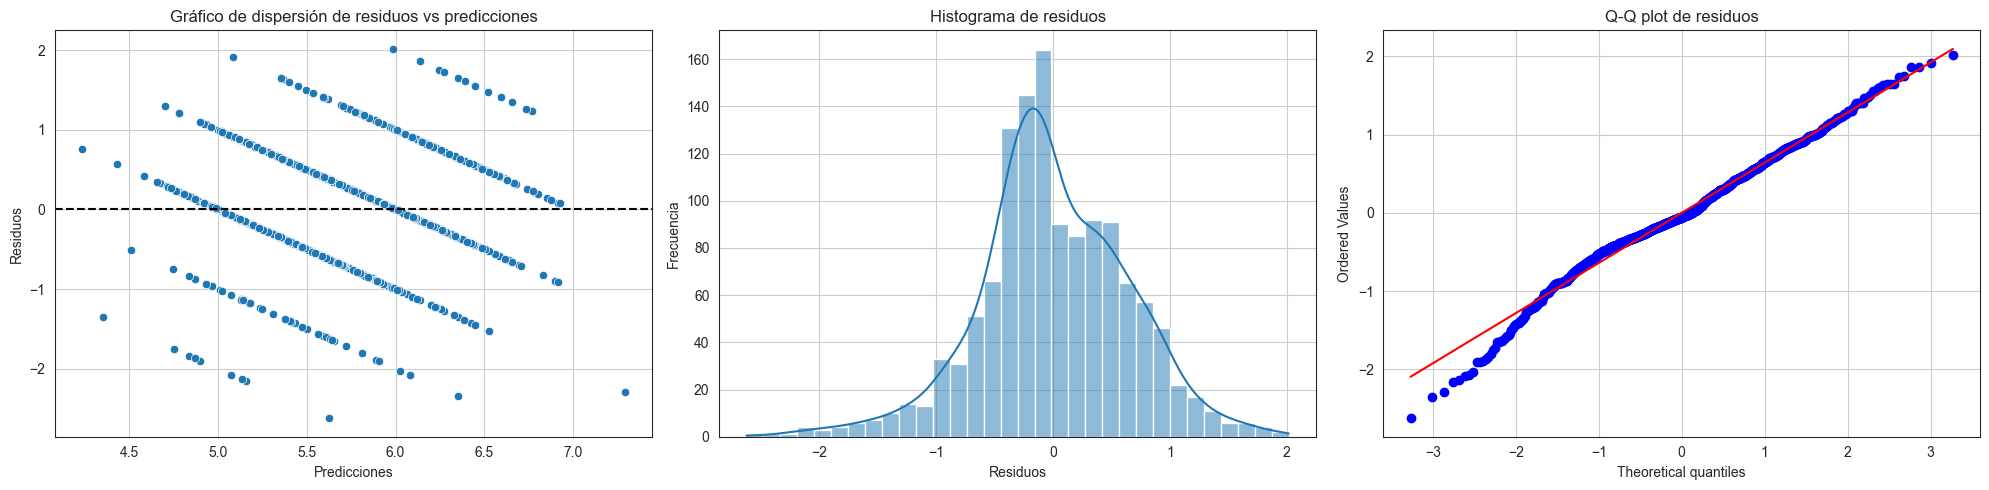

In [18]:
# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Graficar el gráfico de dispersión de residuos vs predicciones
axes[0].axhline(y=0, color='black', linestyle='--')
sns.scatterplot(x=y_pred, y=residual, ax=axes[0])
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Residuos')
axes[0].set_title('Gráfico de dispersión de residuos vs predicciones')
axes[0].grid()

# Graficar el histograma de residuos
sns.histplot(residual, kde=True, ax=axes[1])
axes[1].set_xlabel('Residuos')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de residuos')
axes[1].grid()

# Q-Q plot de residuos
stats.probplot(residual, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q plot de residuos')
axes[2].grid()

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

In [19]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9883787896123919, pvalue=1.490958211329191e-08)

In [20]:
#Otros Modelos
Modelo_sgd = Pipeline(
    steps= [("scaler", StandardScaler()), ("regSGDR", SGDRegressor())] 
)

Modelo_ridge = Pipeline(
    steps= [("scaler", StandardScaler()), ("regRID", Ridge())] 
)

Modelo_lasso = Pipeline(
    steps= [("scaler", StandardScaler()), ("regLASS", Lasso())] 
)

In [21]:
Modelo_Lr.fit(Xtrain, ytrain)
print("Modelo Regresion Lineal: %3f" % Modelo_Lr.score(Xtest, ytest))

Modelo_sgd.fit(Xtrain, ytrain)
print("Modelo SGDR: %3f" % Modelo_sgd.score(Xtest, ytest))

Modelo_ridge.fit(Xtrain, ytrain)
print("Modelo Ridge: %3f" % Modelo_ridge.score(Xtest, ytest))

Modelo_lasso.fit(Xtrain, ytrain)
print("Modelo Lasso: %3f" % Modelo_lasso.score(Xtest, ytest))

Modelo Regresion Lineal: 0.343596
Modelo SGDR: 0.342800
Modelo Ridge: 0.343538
Modelo Lasso: -0.000688


In [22]:
# Obtener los nombres de las características
nombres_coef = Xtrain.columns

# Obtener los coeficientes y los interceptos
coeficientes = Modelo_Lr['lr'].coef_
intercepto = Modelo_Lr['lr'].intercept_

# Crear un DataFrame para mostrar los resultados
Coef_Modelo_Lr = pd.DataFrame({'Característica': ['Intercepto'] + list(nombres_coef),
                              'Coeficiente': [intercepto] + list(coeficientes)})

# Imprimir los resultados
print(Coef_Modelo_Lr)

          Característica  Coeficiente
0             Intercepto     5.631744
1          fixed acidity     0.015292
2       volatile acidity    -0.199662
3            citric acid    -0.017039
4         residual sugar     0.019753
5              chlorides    -0.095074
6    free sulfur dioxide     0.021811
7   total sulfur dioxide    -0.106858
8                density    -0.033353
9                     pH    -0.055585
10             sulphates     0.147599
11               alcohol     0.283567


In [23]:
#Definir variables 
X = wine.drop('quality', axis=1)
y = wine['quality']

y_predict = Modelo_Lr.score(X, y)
print("Coefficient of determination in the training set: ", y_predict)
print("MSE: ", mean_squared_error (ytest, Modelo_Lr.predict(Xtest)))
print("RMSE: ", np.sqrt (mean_squared_error(ytest, Modelo_Lr.predict(Xtest))))

Coefficient of determination in the training set:  0.35862830484053976
MSE:  0.4358867744821143
RMSE:  0.6602172176504596


#### Conclusion del modelo Lineal

* Se generó un modelo de regresión lineal (LinearRegressor) con un escalador de variables "StandarScaler" y se comparó con otros modelos de regresión lineal como SGDRegressor, Ridge y Lasso, en el cual al comparar la metrica del score entre ellas se evidenció que el valor mas alto lo tiene el modelo de Regresion Lineal LinealRegressor. 
* De este modelo se revisaron los supuestos como homocedasticidad (gráfico de dispersión de residuos vs predicciones) para verificar si los residuos están distribuidos aleatoriamente alrededor de cero, que para este caso no lo cumplen pues se muestra que hay un patron dado las calificaciones, por lo que se recomiendo hacer un modelo logistico el cual es muy utilizado en problemas de clasificación.
Otro grafico que se generó para evaluar la calidad del modelo fue el histograma de los residuos donde se muestra a simple vista que los residuos son normales ya que tienen una una forma de campana, sin embargo, al observar el grafico del Q-Q plot hay una desviación de la linea diagonal del grafico indicando desviaciones de la normalidad de los residuos, lo que se confirma con el test de shapiro sugiere que hay evidencia significativa para rechazar la hipótesis nula en favor de la hipótesis alternativa de que los datos no provienen de una distribución normal.
* El R2 del modelo LinearRegressor es de 0.3586 lo que indica que el modelo de regresión explica aproximadamente el 35,86% de la variabilidad de los datos de la variable objetivo con lo que podemos concluir que este modelo tiene una moderada capacidad predictiva sobre la calidad del vino.
* El RMSE es de 0.66 lo que confirma que este modelo (LinearRegressor) no se ajusta a los datos.

#### 7. Asumiremos que si quality es mayor o igual a 6 entonces el vino es bueno, en otro caso diremos que tiene calidad regular. Haga una variable nueva con esta condición y llámela categorical_quality. Esta nueva variable será la variable objetivo de nuestra regresión logística. 

In [24]:
# Definir una función para clasificar los valores como "malo" o "bueno"
def clasificar(valor):
    if valor >= 6:
        return 1
    else:
        return 0

# Aplicar la función a cada valor de la columna 'variable_original' y asignar los resultados a una nueva columna 'variable_nueva'
wine['categorical_quality'] = wine['quality'].apply(clasificar)

wine['categorical_quality'].value_counts()

categorical_quality
1    855
0    744
Name: count, dtype: int64

#### 8. Haga una partición de la base 80-20 para determinar base de entrenamiento y testeo para la regresión logística. Posteriormente, entrene la regresión logística con la base de entrenamiento. 

In [25]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categorical_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [26]:
wine_cat = wine.drop(columns=['quality'])

In [27]:
wine_cat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,categorical_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


#### Regresion Logistica

In [28]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(wine_cat.drop(columns=['categorical_quality'])
                                                 , wine['categorical_quality'], test_size=0.2, random_state=123)

In [29]:
Modelo_Log = Pipeline([('scaler', StandardScaler()),
                       ('logistic Regession', LogisticRegression())])

Modelo_Log.fit(Xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic Regession', LogisticRegression())])

#### 9. Resuma los estadísticos de validación según la implementación en la base de testeo.

In [30]:
# Matriz de confunsion
ypred = Modelo_Log.predict(Xtest)
conf_matrix = confusion_matrix(ytest, ypred)

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

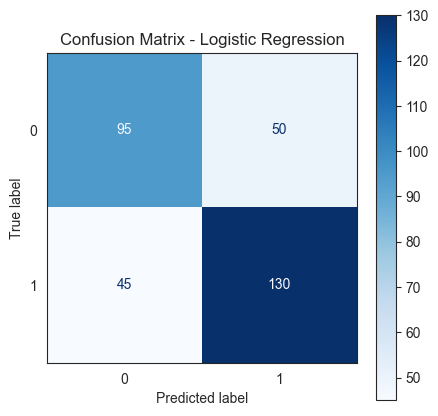

In [31]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay.from_estimator(Modelo_Log,
                                             Xtest,
                                             ytest,
                                             display_labels=Modelo_Log.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Logistic Regression')

In [32]:
#Metrica de desempeño
target_names = ['Regular', 'Bueno']
print(classification_report(ytest, ypred, target_names=target_names))

              precision    recall  f1-score   support

     Regular       0.68      0.66      0.67       145
       Bueno       0.72      0.74      0.73       175

    accuracy                           0.70       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.70      0.70      0.70       320



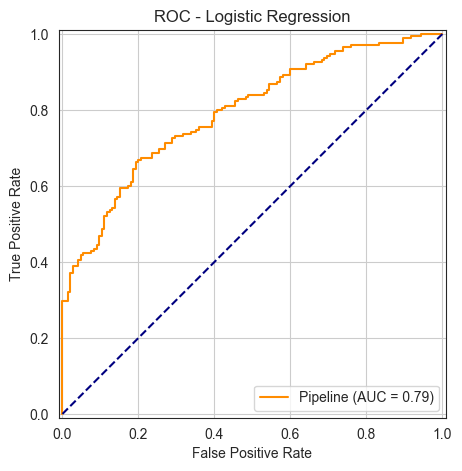

In [33]:
#Curva de ROC y AUC
fig, ax = plt.subplots()
fig.set_size_inches(5,8)
RocCurveDisplay.from_estimator(Modelo_Log, Xtest, ytest, ax=ax, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Logistic Regression")
plt.grid()
plt.show()

#### 10. Saque sus conclusiones, si ve la posibilidad de reentrenar el modelo y mejorar sus resultados hágalo.

In [34]:
Modelo_Log1 = Pipeline([('scaler', MinMaxScaler()),
                       ('logistic Regession', LogisticRegression())])

Modelo_Log1.fit(Xtrain, ytrain)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic Regession', LogisticRegression())])

In [35]:
Modelo_Log.fit(Xtrain, ytrain)
print("Modelo Regresion Logistica Inicial: %3f" % Modelo_Log.score(Xtest, ytest))

Modelo_Log1.fit(Xtrain, ytrain)
print("Modelo Regresion Logistica Ajustada: %3f" % Modelo_Log1.score(Xtest, ytest))

Modelo Regresion Logistica Inicial: 0.703125
Modelo Regresion Logistica Ajustada: 0.712500


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

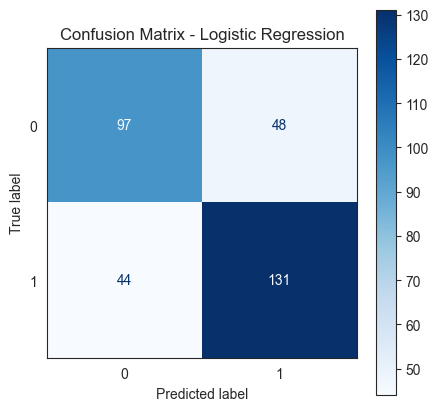

In [36]:
# Matriz de confunsion
ypred_adj = Modelo_Log1.predict(Xtest)
conf_matrix = confusion_matrix(ytest, ypred_adj)

#Grafico
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay.from_estimator(Modelo_Log1,
                                             Xtest,
                                             ytest,
                                             display_labels=Modelo_Log1.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Logistic Regression')

In [37]:
#Metrica de desempeño
target_names = ['Regular', 'Bueno']
print(classification_report(ytest, ypred_adj, target_names=target_names))

              precision    recall  f1-score   support

     Regular       0.69      0.67      0.68       145
       Bueno       0.73      0.75      0.74       175

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.71      0.71      0.71       320



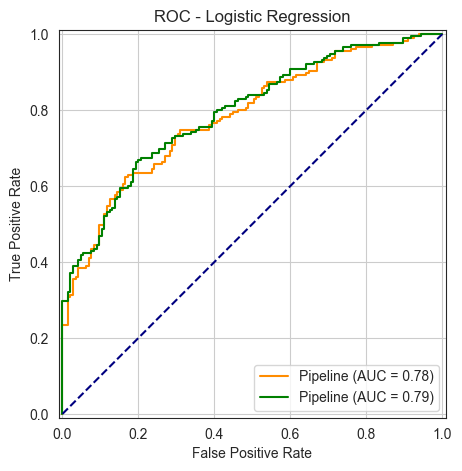

In [38]:
#Curva de ROC y AUC
fig, ax = plt.subplots()
fig.set_size_inches(5,8)
RocCurveDisplay.from_estimator(Modelo_Log1, Xtest, ytest, ax=ax, color="darkorange")
RocCurveDisplay.from_estimator(Modelo_Log, Xtest, ytest, ax=ax, color="green")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Logistic Regression")
plt.grid()
plt.show()

#### Conclusion Regresion Logistica

Se realizarón dos modelos logisiticos, el primero fue utilizando una tecnica de preprocesado de datos de "StandarScaler" y el segundo de "MaxMinScaler", al comparar el score del test para ambos modelos el modelo logistico que usó "MaxMinScaler" fue el mas alto. Este ultimo modelo presentó una mejor discrimación entre los vinos bueno y los regulares ya que los indicadores de precision y recall incrementaron, sin embargo aunque se envidencia en la matriz de confusión una mejor clasificación de este modelo frente al otro, al ver la curva ROC y el AUC no existe una gran diferencia entre ambos modelo ya que, el primer modelo (Modelo logistico que utiliza "StandarScaler") tiene un AUC de 0.79 y el segundo (Modelo logistico que utiliza "MaxMinScaler") es de 0.78


#### 11. En un párrafo explique ¿Cuál de los dos modelos fue mejor? Justifique adecuadamente su respuesta. 

Basándonos en los resultados obtenidos, el modelo logístico parece ser mejor modelo que el de regresión lineal para predecir la calidad del vino tinto. Esto se debe a que el modelo logístico es más adecuado para problemas de clasificación binaria, como el que tenemos para esta actividad, donde la variable objetivo representa niveles de calidad de vino (variable discreta).